## Линейная регрессия

In [389]:
import pandas as pd 
data = pd.read_csv("mlclass-ex1/ex1data1.txt", header=None)
data.columns = ['population', 'profit']
print(data)

    population    profit
0       6.1101  17.59200
1       5.5277   9.13020
2       8.5186  13.66200
3       7.0032  11.85400
4       5.8598   6.82330
..         ...       ...
92      5.8707   7.20290
93      5.3054   1.98690
94      8.2934   0.14454
95     13.3940   9.05510
96      5.4369   0.61705

[97 rows x 2 columns]


1. Построим точечную диаграмму зависимости выгоды от популяции

Text(0, 0.5, 'Profit in $10,000s')

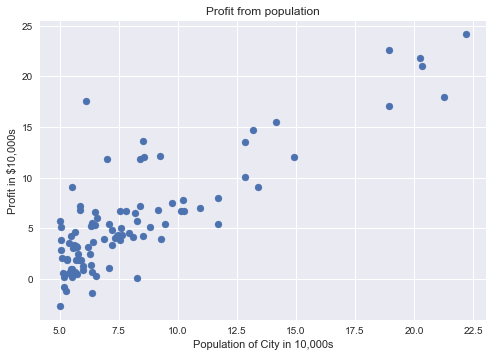

In [390]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.scatter(data['population'], data['profit'])
plt.title('Profit from population')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

2. Градиентный спуск

In [391]:
import numpy as np

def cost(X,y,theta):
    m = len(y)
    predict = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predict - y))
    return cost

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations+1)
    theta0_history = np.zeros(iterations+1)
    theta1_history = np.zeros(iterations+1)
    
    theta0_history[0] = theta[0]
    theta1_history[0] = theta[1]
    cost_history[0] = cost(X,y,theta)
    
    for it in range(iterations):
        predict = X.dot(theta)
        theta = theta - (1/m) * alpha * (X.T.dot((predict - y)))
        #print("Cost: ", cost(X,y,theta))
        theta0_history[it+1] = theta[0]
        theta1_history[it+1] = theta[1]
        cost_history[it+1] = cost(X,y,theta)
        
    return theta, theta0_history, theta1_history, cost_history

In [392]:
x = np.array(data['population'])
X = np.c_[np.ones(len(x)), x]
y = np.array(data['profit'])

theta = np.array([0, 0])

iterations = 1500
alpha = 0.01

print("Start cost: ", cost(X,y,theta))

theta, theta0_history, theta1_history, cost_history = gradient_descent(X, y, theta, alpha, iterations)

Start cost:  32.072733877455676


3. Предскажем выгоду для популяции в 35 и 70 тысяч человек:

In [393]:
predict1 = np.array([1, 3.5]).dot(theta)
print("Для популяции в 35 тысяч человек предполагаемый доход: ", predict1)
predict2 = np.array([1, 37]).dot(theta)
print("Для популяции в 70 тысяч человек предполагаемый доход: ", predict2)

Для популяции в 35 тысяч человек предполагаемый доход:  0.4519767867701767
Для популяции в 70 тысяч человек предполагаемый доход:  39.525115523012175


4. Визуализируем зависимость квадратичной функции ошибки от значения коэффициентов:

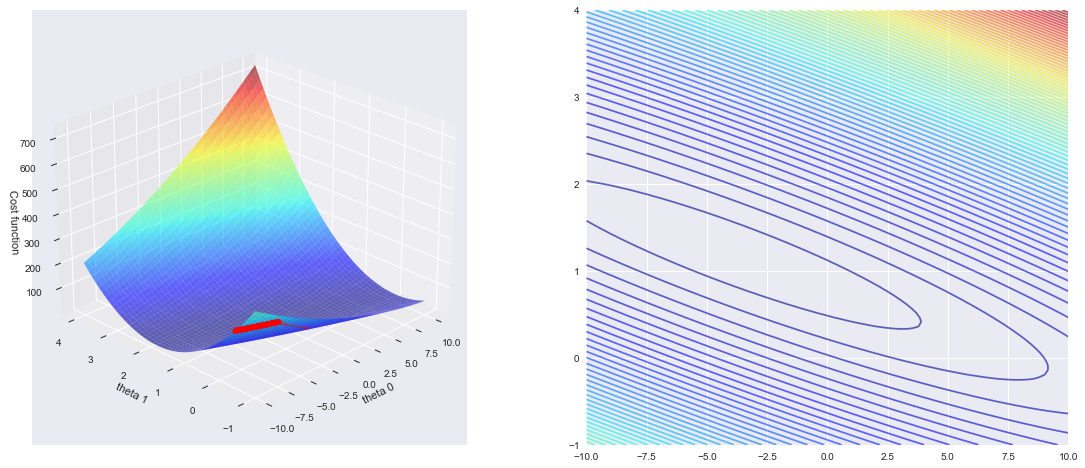

In [394]:
theta = np.array([0, 0])
iterations = 1500
alpha = 0.01

T0, T1 = np.meshgrid(np.linspace(-10,10,100),np.linspace(-1,4,100))
z = np.zeros((len(theta0_history), len(theta1_history)))

z = np.array([cost(X, y, np.array([t0,t1])) for t0, t1 in zip(np.ravel(T0), np.ravel(T1)) ] )
Z = z.reshape(T0.shape)

theta_res, theta0_history, theta1_history, cost_history = gradient_descent(X, y, theta, alpha, iterations)

fig = plt.figure(figsize = (19,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(T0, T1, Z, rstride = 2, cstride = 2, cmap = 'jet', alpha=0.6)
ax.plot(theta0_history, theta1_history, cost_history, marker = '*', color = 'r', alpha = .4, label = 'Gradient descent')

ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('Cost function')
ax.view_init(25, 225)

#Contour plot
anglesx = np.array(theta0_history)[1:] - np.array(theta0_history)[:-1]
anglesy = np.array(theta1_history)[1:] - np.array(theta1_history)[:-1]

ax = fig.add_subplot(1, 2, 2)
ax.contour(T0, T1, Z, 90, cmap = 'jet', alpha=0.6)
#ax.quiver(theta0_history[:-1], theta1_history[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)


## Множественная линейная регрессия

In [395]:
data_multi = pd.read_csv("mlclass-ex1/ex1data2.txt", header=None)
print(data_multi)

       0  1       2
0   2104  3  399900
1   1600  3  329900
2   2400  3  369000
3   1416  2  232000
4   3000  4  539900
5   1985  4  299900
6   1534  3  314900
7   1427  3  198999
8   1380  3  212000
9   1494  3  242500
10  1940  4  239999
11  2000  3  347000
12  1890  3  329999
13  4478  5  699900
14  1268  3  259900
15  2300  4  449900
16  1320  2  299900
17  1236  3  199900
18  2609  4  499998
19  3031  4  599000
20  1767  3  252900
21  1888  2  255000
22  1604  3  242900
23  1962  4  259900
24  3890  3  573900
25  1100  3  249900
26  1458  3  464500
27  2526  3  469000
28  2200  3  475000
29  2637  3  299900
30  1839  2  349900
31  1000  1  169900
32  2040  4  314900
33  3137  3  579900
34  1811  4  285900
35  1437  3  249900
36  1239  3  229900
37  2132  4  345000
38  4215  4  549000
39  2162  4  287000
40  1664  2  368500
41  2238  3  329900
42  2567  4  314000
43  1200  3  299000
44   852  2  179900
45  1852  4  299900
46  1203  3  239500


Построим диаграммы зависимости

Text(0, 0.5, 'Price of house')

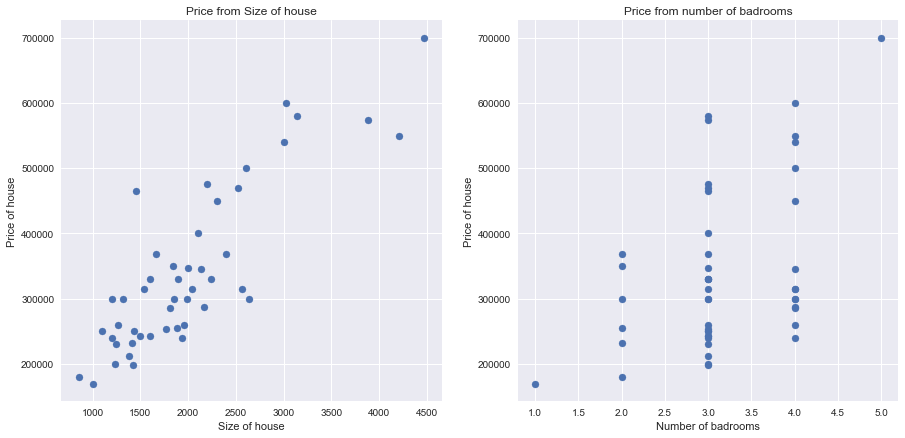

In [396]:
plt.style.use('seaborn')

plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.scatter(data_multi[0], data_multi[2])
plt.title('Price from Size of house')
plt.xlabel('Size of house')
plt.ylabel('Price of house')

plt.subplot(1, 2, 2)
plt.scatter(data_multi[1], data_multi[2])
plt.title('Price from number of badrooms')
plt.xlabel('Number of badrooms')
plt.ylabel('Price of house')

In [397]:
x = np.array(data_multi[[0, 1]])
X = np.c_[np.ones(len(x)), x]
y = np.array(data_multi[2])

#Normalization
mean_value = np.mean(X[:,1])
X[:,1] -= mean_value
print("Mean value: ",mean_value)

std_dev = np.std(X[:,1])
X[:,1] /= std_dev
print("Standart deviation: ", std_dev)

Mean value:  2000.6808510638298
Standart deviation:  786.2026187430467


In [398]:
def gradient_descent_multi(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations+1)
    theta0_history = np.zeros(iterations+1)
    theta1_history = np.zeros(iterations+1)
    theta2_history = np.zeros(iterations+1)
    
    theta0_history[0] = theta[0]
    theta1_history[0] = theta[1]
    theta2_history[0] = theta[2]
    cost_history[0] = cost(X,y,theta)
    
    for it in range(iterations):
        predict = X.dot(theta)
        theta = theta - (1/m) * alpha * (X.T.dot(predict - y))
        #print("Cost: ", cost(X,y,theta))
        theta0_history[it+1] = theta[0]
        theta1_history[it+1] = theta[1]
        theta2_history[it+1] = theta[1]
        cost_history[it+1] = cost(X,y,theta)
        
    return theta, theta0_history, theta1_history, cost_history

In [399]:
theta = np.zeros(3)
cost(X, y, theta)

65591548106.45744

Text(0, 0.5, 'Cost')

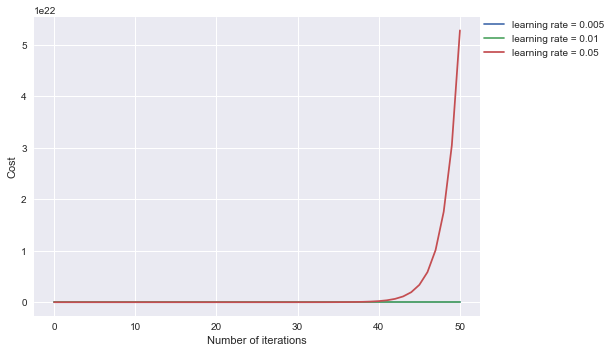

In [400]:
theta = np.zeros(3)

alpha = 0.005
iterations = 50
theta, theta0_history, theta1_history, cost_history = gradient_descent_multi(X, y, theta, alpha, iterations)

theta = np.zeros(3)
alpha = 0.01
theta, theta0_history, theta1_history, cost_history2 = gradient_descent_multi(X, y, theta, alpha, iterations)
theta = np.zeros(3)
alpha = 0.2
theta, theta0_history, theta1_history, cost_history3 = gradient_descent_multi(X, y, theta, alpha, iterations)

plt.figure()
plt.plot(cost_history, label="learning rate = 0.005")
plt.plot(cost_history2, label="learning rate = 0.01")
plt.plot(cost_history3, label="learning rate = 0.05")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.)

plt.xlabel('Number of iterations')
plt.ylabel('Cost')

-306416016011.04553


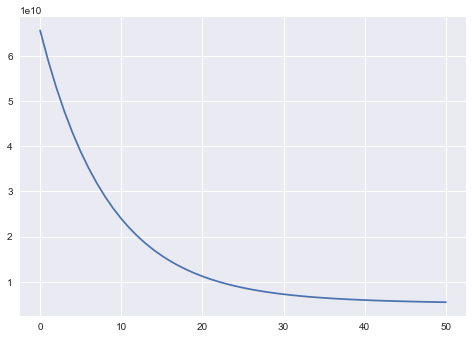

In [401]:
predict_multi = np.array([1, 1.314, 3]).dot(theta)
print(predict_multi)

plt.figure()
plt.plot(cost_history)


In [402]:
theta = np.zeros(3)
alpha = 0.01
theta, theta0_history, theta1_history, cost_history2 = gradient_descent_multi(X, y, theta, alpha, iterations)
print(theta)

predict_multi = np.array([1, (1650 - mean_value)/std_dev, 3]).dot(theta)
print("Предполагаемая стоимость дома с площадью 1650 кв.м. и 3 спальнями: ", predict_multi)

[31659.13209329 28105.8540563  95060.71228034]
Предполагаемая стоимость дома с площадью 1650 кв.м. и 3 спальнями:  304304.8252932222


In [403]:
x = np.array(data_multi[[0, 1]])
X = np.c_[np.ones(len(x)), x]

theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(theta)
predict_multi2 = np.array([1, 1650, 3]).dot(theta)
print("Предполагаемая стоимость дома с площадью 1650 кв.м. и 3 спальнями: ", predict_multi2)

[89597.9095428    139.21067402 -8738.01911233]
Предполагаемая стоимость дома с площадью 1650 кв.м. и 3 спальнями:  293081.4643348959
